<a href="https://colab.research.google.com/github/chiarasanguineti/hair-loss/blob/main/hair-loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset


This dataset contains information about various factors that may contribute to baldness in individuals. Each row represents a unique individual, and the columns represent different factors related to genetics, hormonal changes, medical conditions, medications and treatments, nutritional deficiencies, stress levels, age, poor hair care habits, environmental factors, smoking habits, weight loss, and the presence or absence of baldness.

Columns:

- Genetics: Indicates whether the individual has a family history of baldness (Yes/No).
- Hormonal Changes: Indicates whether the individual has experienced hormonal changes (Yes/No).
- Medical Conditions: Lists specific medical conditions that may contribute to baldness, such as Alopecia Areata, Thyroid Problems, Scalp Infection, Psoriasis, Dermatitis, etc.
- Medications & Treatments: Lists medications and treatments that may lead to hair loss, such as Chemotherapy, Heart Medication Antidepressants, Steroids, etc.
- Nutritional Deficiencies: Lists nutritional deficiencies that may contribute to hair loss, such as Iron deficiency, Vitamin D deficiency, Biotin deficiency, Omega-3 fatty acid deficiency, etc.
- Stress: Indicates the stress level of the individual (Low/Moderate/High).
- Age: Represents the age of the individual.
- Poor Hair Care Habits: Indicates whether the individual practices poor hair care habits (Yes/No).
- Environmental Factors: Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).
- Smoking: Indicates whether the individual smokes (Yes/No).
- Weight Loss: Indicates whether the individual has experienced significant weight loss (Yes/No).
- Baldness (Target): Binary variable indicating the presence (1) or absence (0) of baldness in the individual.


Dataset Purpose:

The dataset is intended for exploratory data analysis, modeling, and predictive analytics tasks aimed at understanding the relationship between various factors and the likelihood of baldness in individuals.

In [ ]:
import pandas as pd
hair = pd.read_csv('Predict Hair Fall.csv')

In [ ]:
hair

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


## DATA TRANSFORMATION

I change the column names by putting _ instead of blanks, so that the code syntax is better for future analysis.

In [ ]:
hair.columns = hair.columns.str.strip().str.replace(" ", "_")

In [ ]:
# check
hair

,Id,Genetics,Hormonal_Changes,Medical_Conditions,Medications_&_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair_Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


I also decide to change the values within the Hair Loss column, indicating the presence (1) or absence (0) of baldness in the individual to Yes and No respectively.

In [ ]:
print(hair['Hair_Loss'])

0      0
1      0
2      0
3      0
4      1
      ..
994    1
995    0
996    1
997    1
998    1
Name: Hair_Loss, Length: 999, dtype: int64


In [ ]:
# use of loc to replace values
# pandas.DataFrame.loc[condition, column_label] = new_value
hair.loc[hair['Hair_Loss'] == 0, 'Hair_Loss'] = 'No'
hair.loc[hair['Hair_Loss'] == 1, 'Hair_Loss'] = 'Yes'

In [ ]:
# check
print(hair['Hair_Loss'])

0       No
1       No
2       No
3       No
4      Yes
      ... 
994    Yes
995     No
996    Yes
997    Yes
998    Yes
Name: Hair_Loss, Length: 999, dtype: object



The 'Id' column is superfluous, so I will remove it.



In [ ]:
# column elimination Id
hair = hair.drop('Id', axis=1)

In [ ]:
# dataset information
hair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Genetics                  999 non-null    object
 1   Hormonal_Changes          999 non-null    object
 2   Medical_Conditions        999 non-null    object
 3   Medications_&_Treatments  999 non-null    object
 4   Nutritional_Deficiencies  999 non-null    object
 5   Stress                    999 non-null    object
 6   Age                       999 non-null    int64 
 7   Poor_Hair_Care_Habits     999 non-null    object
 8   Environmental_Factors     999 non-null    object
 9   Smoking                   999 non-null    object
 10  Weight_Loss               999 non-null    object
 11  Hair_Loss                 999 non-null    object
dtypes: int64(1), object(11)
memory usage: 93.8+ KB


The dataset has already clean data: it can be deduced from the Non-Null Count that there are no null values.
Safety, I check with .isnull

In [ ]:
# check for null values dataframe.isnull().sum()
hair.isnull().sum()

Genetics                    0
Hormonal_Changes            0
Medical_Conditions          0
Medications_&_Treatments    0
Nutritional_Deficiencies    0
Stress                      0
Age                         0
Poor_Hair_Care_Habits       0
Environmental_Factors       0
Smoking                     0
Weight_Loss                 0
Hair_Loss                   0
dtype: int64

I can now proceed with the data exploration.

# Data Exploration and Statistic Tests

## Univariate data analysis

In [ ]:
hair

,Genetics,Hormonal_Changes,Medical_Conditions,Medications_&_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair_Loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,No
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,No
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,No
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,No
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
994,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,Yes
995,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,No
996,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,Yes
997,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,Yes


In [ ]:
# Hair Loss analysis
hair['Hair_Loss'].describe()

count     999
unique      2
top        No
freq      502
Name: Hair_Loss, dtype: object

I have 999 counts of 2 variables (Yes or No), in which the most frequent was counted 502 times.

In [ ]:
import matplotlib.pyplot as plt

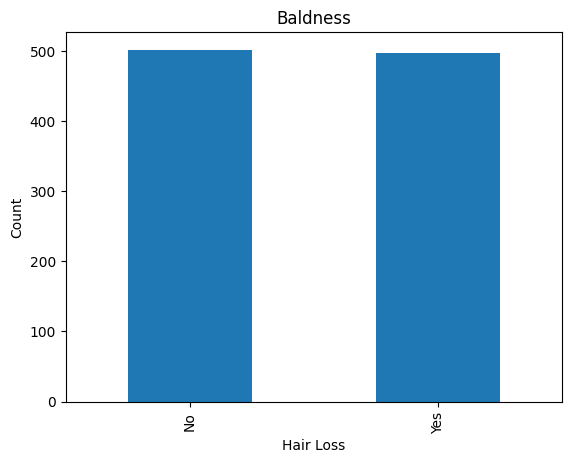

In [ ]:
# count of occurrences of 'Yes' and 'No' in the 'Hair_Loss' column
hair_loss_counts = hair['Hair_Loss'].value_counts()

# bar chart
hair_loss_counts.plot(kind='bar', title='Baldness')
plt.xlabel('Hair Loss')
plt.ylabel('Count')
plt.show()

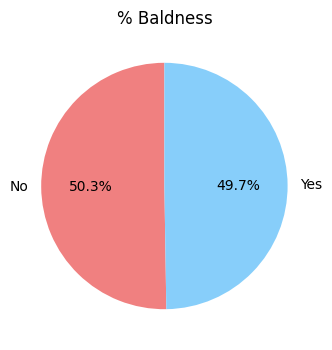

In [ ]:
# Hair_Loss - Pie chart
plt.figure(figsize=(4, 4))
plt.pie(hair_loss_counts, labels=hair_loss_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('% Baldness')
plt.show()

These graphs show that we have more individuals who do not suffer from baldness than those who do.
Specifically, out of 999 individuals:
- 50.3% (502 people) do not suffer from baldness,
- 49.7 % do (497 people).

We better understand in which age groups our individuals are concentrated.


In [ ]:
selected_column = 'Age'

# use of the describe method on the selected column
description_column = hair[selected_column].describe()
print(description_column)

count    999.000000
mean      34.188188
std        9.377980
min       18.000000
25%       26.000000
50%       34.000000
75%       42.000000
max       50.000000
Name: Age, dtype: float64


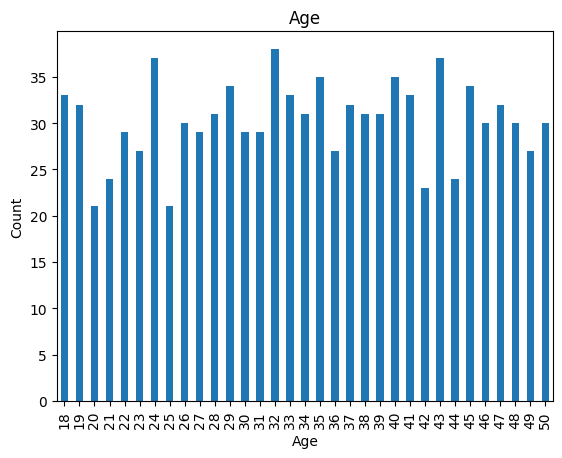

In [ ]:
# count of occurrences for age
age_counts = hair['Age'].value_counts()

# index order (age) in ascending order
age_counts = age_counts.sort_index()

# bar chart
age_counts.plot(kind='bar', title='Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


To better understand age distributions, I use a box-plot.



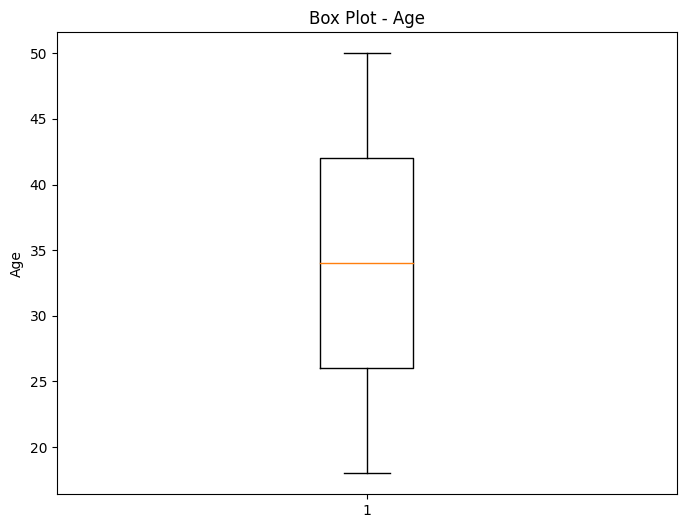

In [ ]:
# Age - Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(hair['Age'])
plt.title('Box Plot - Age')
plt.xlabel('')
plt.ylabel('Age')
plt.show()

We can conclude that
- the youngest individual is 18 years old.
- the oldest individual is 50 years old.
- 25% of the individuals are less than 26 years old.
- 75% of individuals are less than 42 years old.


So we are treating data from 999 individuals aged between 18 and 50 years and 50% of individuals are aged between 26 and 42 years.


In [ ]:
# Genetics analysis
hair['Genetics'].describe()

count     999
unique      2
top       Yes
freq      522
Name: Genetics, dtype: object

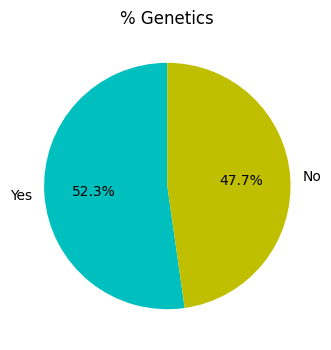

In [ ]:
# pie chart for Genetics
# count of occurrences of 'Yes' and 'No' in the 'Genetics' column
genetics_counts = hair['Genetics'].value_counts()

# Genetics - Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(genetics_counts, labels=genetics_counts.index, autopct='%1.1f%%', startangle=90, colors=["c", "y"])
plt.title('% Genetics')
plt.show()

Out of 999 individuals, 522 (52.3%) have a genetic history of baldness, while 477 (47.7%) do not.

From a medical point of view we can analyse various conditions on these individuals:
- their medical conditions, i.e. specific medical conditions from which each individual is affected that may contribute to baldness;
- what medications they take and what treatments they receive;
- if they have any nutritional deficiencies;
- if they have had any significant weight loss or not.

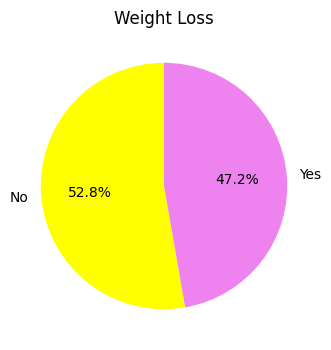

In [ ]:
# Weight_Loss - Pie Chart
# count of occurrences of 'Yes' and 'No' in the 'Weight_Loss' column
weight_counts = hair['Weight_Loss'].value_counts()

# pie chart
plt.figure(figsize=(4, 4))
plt.pie(weight_counts, labels=weight_counts.index, autopct='%1.1f%%', startangle=90, colors=["yellow", "violet"])
plt.title('Weight Loss')
plt.show()

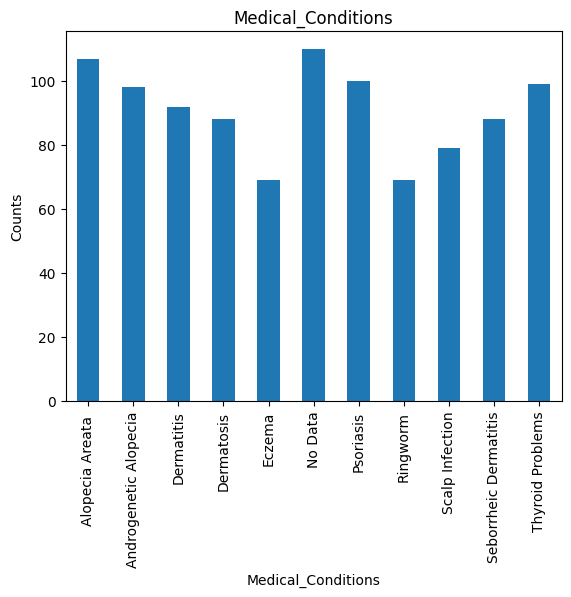

In [ ]:
# count of occurrences of 'Yes' and 'No' in the 'Medical_Conditions' column
Medical_Conditions_counts = hair['Medical_Conditions'].value_counts()

# alphabetical order
Medical_Conditions_counts = Medical_Conditions_counts.sort_index()

# bar chart
Medical_Conditions_counts.plot(kind='bar', title='Medical_Conditions')
plt.xlabel('Medical_Conditions')
plt.ylabel('Counts')
plt.show()

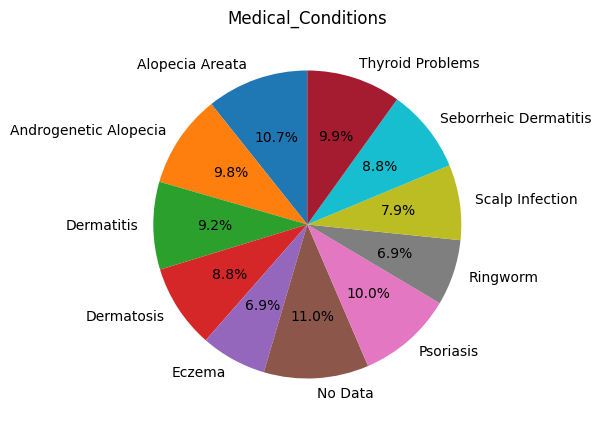

In [ ]:
# Medical Conditions - Pie Chart
my_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#a51c30']
plt.figure(figsize=(5, 5))
plt.pie(Medical_Conditions_counts, labels=Medical_Conditions_counts.index, autopct='%1.1f%%', startangle=90, colors= my_colors)
plt.title('Medical_Conditions')
plt.show()

In [ ]:
hair['Medical_Conditions'].describe()

count         999
unique         11
top       No Data
freq          110
Name: Medical_Conditions, dtype: object

In [ ]:
hair['Medications_&_Treatments'].describe()

count         999
unique         11
top       Rogaine
freq          116
Name: Medications_&_Treatments, dtype: object

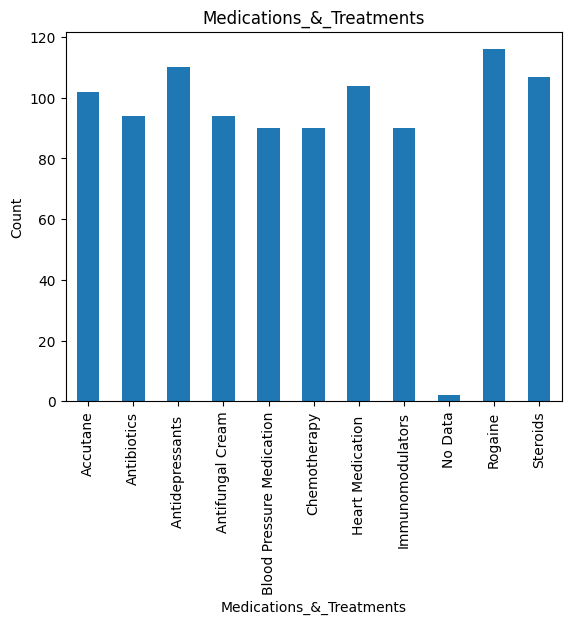

In [ ]:
# count of occurrences of Medical_&_Treatments
medications_counts = hair['Medications_&_Treatments'].value_counts()

# alphabetical order
medications_counts = medications_counts.sort_index()

# bar chart
medications_counts.plot(kind='bar', title='Medications_&_Treatments')
plt.xlabel('Medications_&_Treatments')
plt.ylabel('Count')
plt.show()

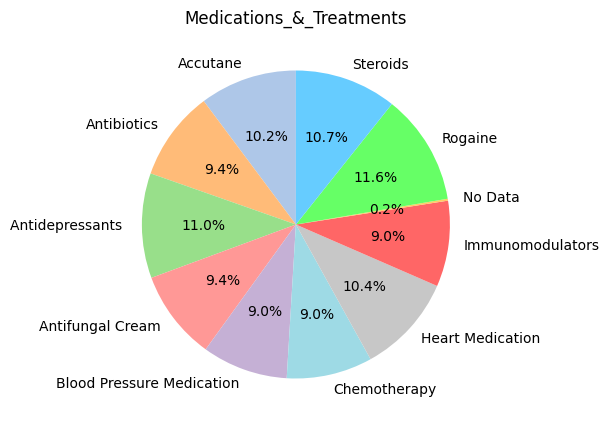

In [ ]:
# Pie Chart - Medications_&_Treatments
my_colors = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#9edae5', '#c7c7c7', '#ff6666', '#ffcc66', '#66ff66', '#66ccff']
plt.figure(figsize=(5, 5))
plt.pie(medications_counts, labels=medications_counts.index, autopct='%1.1f%%', startangle=90, colors= my_colors)
plt.title('Medications_&_Treatments')
plt.show()

In [ ]:
hair['Nutritional_Deficiencies'].describe()

count                 999
unique                 11
top       Zinc Deficiency
freq                  108
Name: Nutritional_Deficiencies, dtype: object

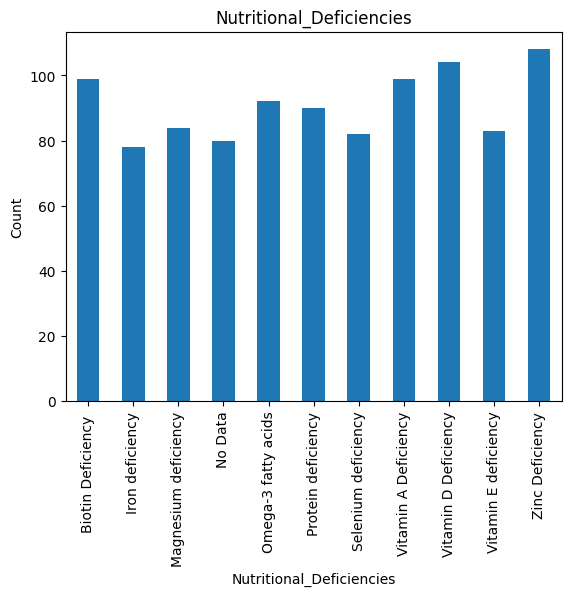

In [ ]:
# count of occurrences of Nutritional Deficiencies
deficiencies_counts = hair['Nutritional_Deficiencies'].value_counts()

# alphabetical order
deficiencies_counts = deficiencies_counts.sort_index()

# bar chart - nutritional deficiencies
deficiencies_counts.plot(kind='bar', title='Nutritional_Deficiencies')
plt.xlabel('Nutritional_Deficiencies')
plt.ylabel('Count')
plt.show()

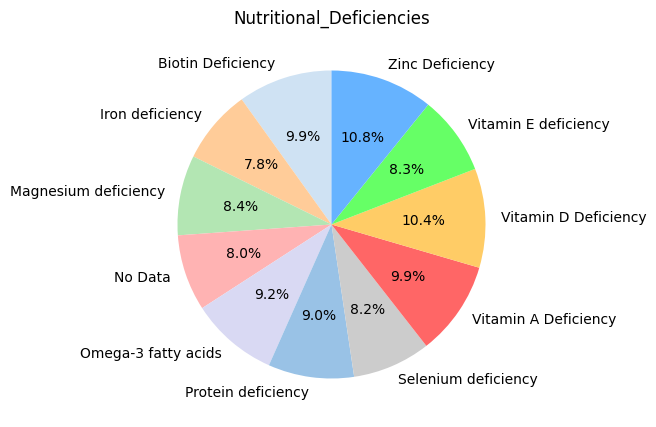

In [ ]:
# pie chart - Nutritional_Deficiencies
my_colors = ['#cfe2f3', '#ffcc99', '#b3e6b3', '#ffb3b3', '#d9d9f3', '#99c2e6', '#cccccc', '#ff6666', '#ffcc66', '#66ff66', '#66b3ff']
plt.figure(figsize=(5, 5))
plt.pie(deficiencies_counts, labels=deficiencies_counts.index, autopct='%1.1f%%', startangle=90, colors= my_colors)
plt.title('Nutritional_Deficiencies')
plt.show()

Out of 999 individuals:
- 47.2% had any significant weight loss
- the most frequent treatment is Rogaine (116 individuals)
- the most frequent nutritional deficiency is Zinc Deficiency (108 individuals)
- the most frequent values in Medical_Conditions is No Data, so I decide to eliminate that column due to inconsistency.

In [ ]:
hair = hair.drop(columns=['Medical_Conditions'])

In [ ]:
hair

,Genetics,Hormonal_Changes,Medications_&_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair_Loss
0,Yes,No,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,No
1,No,No,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,No
2,No,No,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,No
3,Yes,Yes,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,No
4,No,No,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
994,Yes,No,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,Yes
995,Yes,Yes,Accutane,Protein deficiency,Low,47,No,No,No,Yes,No
996,No,Yes,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,Yes
997,No,Yes,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,Yes


We can also look at our data according to other factors such as:
- stress,
- bad hair care habits,
- environmental factors,
- if they are smokers or not.



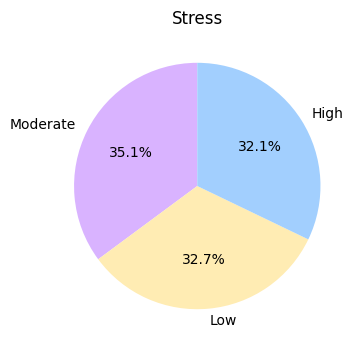

In [ ]:
# Stress - Pie Chart
# occurrence count for the column 'Stress'
stress_counts = hair['Stress'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(stress_counts, labels=stress_counts.index, autopct='%1.1f%%', startangle=90, colors=['#d9b3ff', '#ffecb3', '#a2cffe'])
plt.title('Stress')
plt.show()

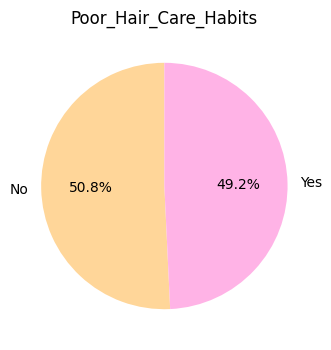

In [ ]:
# Poor Hair Care Habits - Pie Chart
# occurrence count for the column 'Poor Hair Care Habits'
habits_counts = hair['Poor_Hair_Care_Habits'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(habits_counts, labels=habits_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ffd699', '#ffb3e6'])
plt.title('Poor_Hair_Care_Habits')
plt.show()

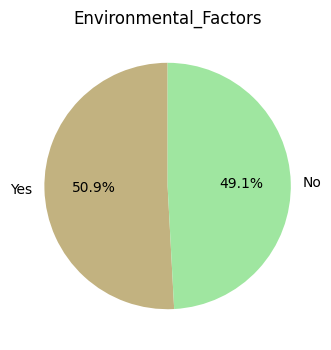

In [ ]:
# Environmental Factors - Pie Chart
# occurrence count for the column 'Environmental_Factors'
environment_counts = hair['Environmental_Factors'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(environment_counts, labels=environment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#c2b280', '#9fe6a0'])
plt.title('Environmental_Factors')
plt.show()

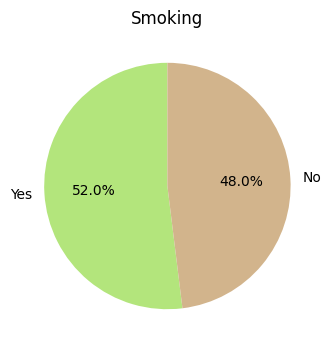

In [ ]:
# Smoking - Pie Chart
# occurrence count for the column 'Smoking'
smoking_counts = hair['Smoking'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['#b3e57c', '#d2b48c'])
plt.title('Smoking')
plt.show()

We have an almost equal division between Low, Moderate and High Stress.
Out of a total of 999 individuals
- 49.2% take poor hair care
- 52% smoke
- 50.9% are exposed to environmental factors that may contribute to hair loss.

## Bivariate analysis and statistical tests

I now conduct a bivariate analysis on several attributes to determine if there is a significant relationship or if the relationship between two variables is random.
In particular, I use the chi-square test to analyse the relationship between two categorical variables and determine whether there is a significant association between them.


The chi-square test is a statistical test used to determine whether there is an association between two categorical variables. Its hypotheses are:
- Null Hypothesis (H0): The null hypothesis states that there is no association between the two categorical variables in the reference population. In other words, the variables are independent of each other.
- Alternative Hypothesis (H1): The alternative hypothesis negates the null hypothesis, indicating that there is an association between the two categorical variables in the reference population. The variables are not independent and there is some form of relationship between them.

The chi-square test assesses whether the observed frequencies in a contingency table are significantly different from the expected frequencies under the null hypothesis. If the p-value of the test is less than a predetermined significance level (usually 0.05), then the null hypothesis can be rejected in favour of the alternative hypothesis, concluding that there is a significant association between the variables. If the p-value is greater than the significance level, there is insufficient evidence to reject the null hypothesis, and it is concluded that there is insufficient evidence to support the association between the variables.

In [ ]:
import seaborn as sns

In [ ]:
hair

,Genetics,Hormonal_Changes,Medications_&_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair_Loss
0,Yes,No,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,No
1,No,No,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,No
2,No,No,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,No
3,Yes,Yes,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,No
4,No,No,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
994,Yes,No,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,Yes
995,Yes,Yes,Accutane,Protein deficiency,Low,47,No,No,No,Yes,No
996,No,Yes,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,Yes
997,No,Yes,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,Yes


In [ ]:
hair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Genetics                  999 non-null    object
 1   Hormonal_Changes          999 non-null    object
 2   Medications_&_Treatments  999 non-null    object
 3   Nutritional_Deficiencies  999 non-null    object
 4   Stress                    999 non-null    object
 5   Age                       999 non-null    int64 
 6   Poor_Hair_Care_Habits     999 non-null    object
 7   Environmental_Factors     999 non-null    object
 8   Smoking                   999 non-null    object
 9   Weight_Loss               999 non-null    object
 10  Hair_Loss                 999 non-null    object
dtypes: int64(1), object(10)
memory usage: 86.0+ KB


In [ ]:
print(hair.head())

  Genetics Hormonal_Changes Medications_&_Treatments Nutritional_Deficiencies  \
0      Yes               No                  No Data     Magnesium deficiency   
1       No               No              Antibiotics     Magnesium deficiency   
2       No               No         Antifungal Cream       Protein deficiency   
3      Yes              Yes              Antibiotics       Biotin Deficiency    
4       No               No                 Accutane          Iron deficiency   

     Stress  Age Poor_Hair_Care_Habits Environmental_Factors Smoking  \
0  Moderate   19                   Yes                   Yes      No   
1      High   43                   Yes                   Yes      No   
2  Moderate   26                   Yes                   Yes      No   
3  Moderate   46                   Yes                   Yes      No   
4  Moderate   30                    No                   Yes     Yes   

  Weight_Loss Hair_Loss  
0          No        No  
1          No        No  
2 

### Hair Loss VS Age

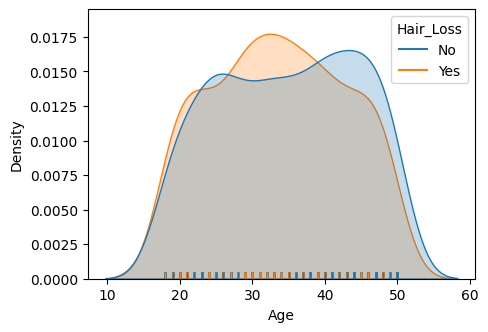

In [ ]:
# creating the kernel density graph (KDE) with Seaborn
fig, ax = plt.subplots(figsize=(5, 3.5))
sns.kdeplot(data=hair, x='Age', hue='Hair_Loss', fill=True, ax=ax)

# addition of rug plots to visualise data distribution
sns.rugplot(data=hair, x='Age', hue='Hair_Loss', ax=ax)

plt.show()

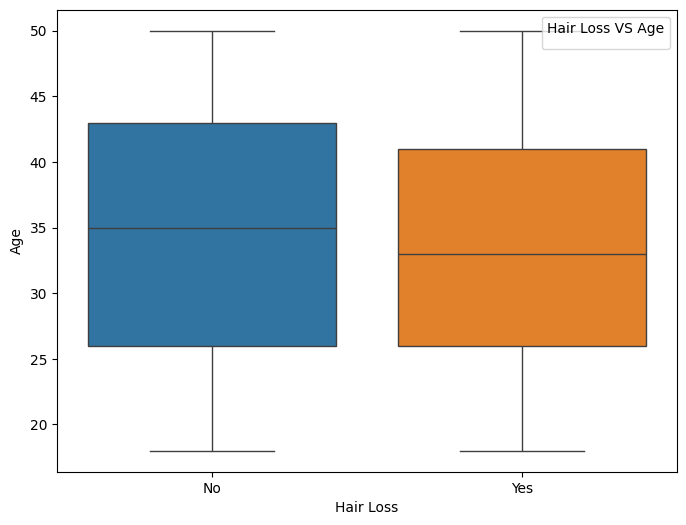

In [ ]:
# Box Plot - Hair Loss VS Age
plt.figure(figsize=(8, 6))
sns.boxplot(data=hair, x='Hair_Loss', y='Age', hue='Hair_Loss')

plt.xlabel('Hair Loss')
plt.ylabel('Age')
plt.legend(title='Hair Loss VS Age', loc='upper right')

plt.show()

From these graphs, we can deduce that we have more hair loss between the ages of 25 and 40.
Let us see if there is a significant association between Hair Loss and Age.

In [ ]:
from scipy.stats import chi2_contingency

#  calculation of the contingency table between the two variables
contingency_table = pd.crosstab(hair['Hair_Loss'], hair['Age'])

# chi2 test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# results output
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 34.95183746770495
P-value: 0.32959044909380214
Degrees of freedom: 32
Expected frequencies table:
[[16.58258258 16.08008008 10.55255255 12.06006006 14.57257257 13.56756757
  18.59259259 10.55255255 15.07507508 14.57257257 15.57757758 17.08508509
  14.57257257 14.57257257 19.0950951  16.58258258 15.57757758 17.58758759
  13.56756757 16.08008008 15.57757758 15.57757758 17.58758759 16.58258258
  11.55755756 18.59259259 12.06006006 17.08508509 15.07507508 16.08008008
  15.07507508 13.56756757 15.07507508]
 [16.41741742 15.91991992 10.44744745 11.93993994 14.42742743 13.43243243
  18.40740741 10.44744745 14.92492492 14.42742743 15.42242242 16.91491491
  14.42742743 14.42742743 18.9049049  16.41741742 15.42242242 17.41241241
  13.43243243 15.91991992 15.42242242 15.42242242 17.41241241 16.41741742
  11.44244244 18.40740741 11.93993994 16.91491491 14.92492492 15.91991992
  14.92492492 13.43243243 14.92492492]]


The results of the chi-square test include the chi-square statistic, p-value, degrees of freedom and expected frequency table.
- The chi-square statistic is 34.95.
- The p-value is approximately 0.33.
- The degrees of freedom are 32.
- The expected frequency table is a 2x32 matrix, where each row represents the expected frequencies for the category "Yes" and "No" respectively for each age value.

The p-value, which is 0.33, is greater than the significance level 0.05: that indicates that there is insufficient evidence to reject the null hypothesis.This means that there is no significant relationship between hair loss and age in my dataset.

### Hair Loss VS Genetics

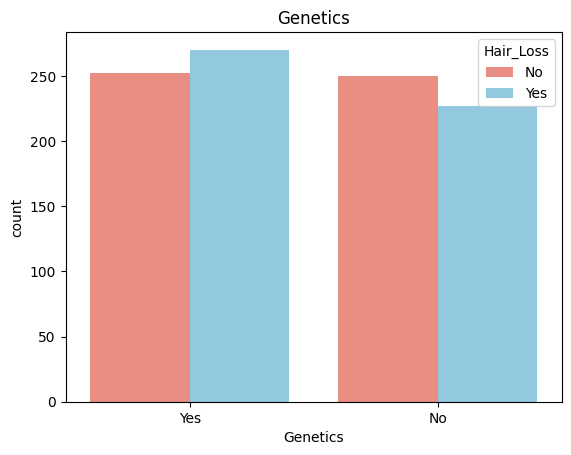

In [ ]:
# palette
custom_palette = {'Yes': 'skyblue', 'No': 'salmon'}

# bar plot - Hair Loss VS Genetics
sns.countplot(data=hair, x='Genetics', hue='Hair_Loss', palette=custom_palette)
plt.title('Genetics')
plt.show()

From the graph we see that there was a higher number of hair loss for those who suffer from baldness genetically than for those who do not have it genetically. But the number of individuals who do not suffer from it is almost equal for those who have it genetically and those who do not.

Let's check if there is an association.

In [ ]:
#  calculation of the contingency table between the two variables
contingency_table_Genetics = pd.crosstab(hair['Hair_Loss'], hair['Genetics'])

# chi2 test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_Genetics)

# results output
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 1.5433285346248653
P-value: 0.21412303866996626
Degrees of freedom: 1
Expected frequencies table:
[[239.69369369 262.30630631]
 [237.30630631 259.69369369]]


The results of the chi-square test for the relationship between 'Hair Loss' and 'Genetics' show:
- Chi-square statistic: 1.54
- p-value: approx. 0.214
- Degrees of freedom: 1
- frequency table.

The p-value of about 0.214 indicates that there is not enough evidence to reject the null hypothesis. (p-value > 0.05).

Thus, we cannot conclude that there is a significant association between hair loss and genetics in this dataset.

### Hair Loss VS Smoking

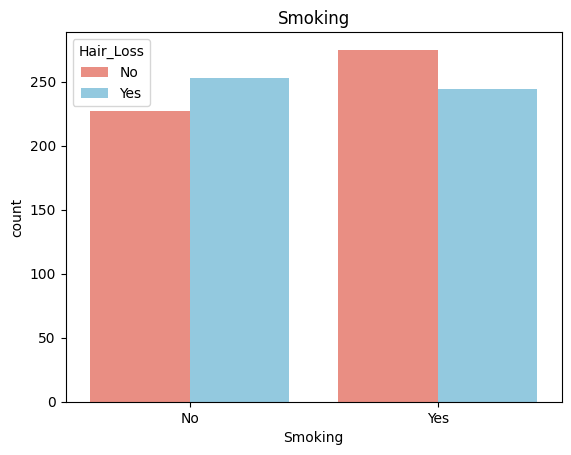

In [ ]:
# Hair Loss VS Smoking - bar plot
sns.countplot(data=hair, x='Smoking', hue='Hair_Loss', palette=custom_palette)
plt.title('Smoking')
plt.show()

The graph shows that more people who do not smoke have lost their hair.

I don't think there is an association between these two variables, but let's try the chi2 test.

In [ ]:
#  calculation of the contingency table between the two variables
contingency_table_Smoking = pd.crosstab(hair['Hair_Loss'], hair['Smoking'])

# chi2 test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_Smoking)

# results output
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 3.0112377862837794
P-value: 0.08268912552440279
Degrees of freedom: 1
Expected frequencies table:
[[241.2012012 260.7987988]
 [238.7987988 258.2012012]]


The results of the chi-square test for the relationship between "Hair Loss" and "Smoking" are as follows:
- Chi-square statistic: 3.01
- p-value: approx. 0.083
- Degrees of freedom: 1

The p-value of approximately 0.083 indicates that there is insufficient evidence to reject the null hypothesis. Therefore, based on these results, we cannot conclude that there is a significant association between hair loss and smoking in this dataset, although the p-value is close to 0.05, so there might be a trend.

### Hair Loss VS Poor Hair Care Habits

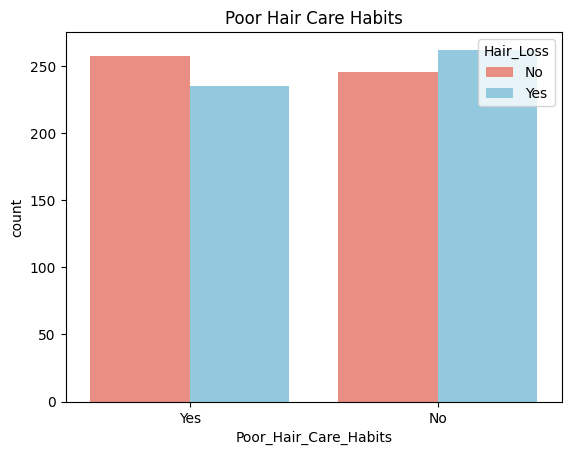

In [ ]:
# bar plot-  Hair Loss VS Poor Hair Care Habits
sns.countplot(data=hair, x='Poor_Hair_Care_Habits', hue='Hair_Loss', palette=custom_palette)
plt.title('Poor Hair Care Habits')
plt.show()

From the graph it would appear that more people who have good hair care suffer from baldness than those who do not.

In [ ]:
contingency_table_Poor_Hair_Care_Habits= pd.crosstab(hair['Hair_Loss'], hair['Poor_Hair_Care_Habits'])

# chi2 test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_Poor_Hair_Care_Habits)

# results output
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 1.376281880823514
P-value: 0.24073549493781138
Degrees of freedom: 1
Expected frequencies table:
[[254.76876877 247.23123123]
 [252.23123123 244.76876877]]


The results of the chi-square test for the relationship between "Hair Loss" and "Poor Hair Care Habits" are as follows:
- Chi-square statistic: 1.38
- p-value: approx. 0.241
- Degrees of freedom: 1

 (p-val > 0.05)

The results of the chi-square test indicate that there is no significant relationship between hair loss and hair care habits in this dataset. The p-value of approximately 0.241 suggests that there is insufficient evidence to reject the null hypothesis, which states that there is no association between the two variables.

Therefore, we cannot conclude that hair care habits are a significant factor in hair loss, at least in the context of the analysed data.

### Hair Loss VS Weight Loss

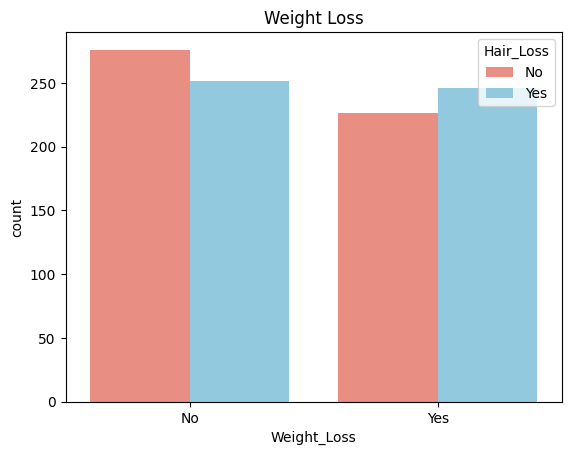

In [ ]:
# Hair Loss VS Weight Loss
sns.countplot(data=hair, x='Weight_Loss', hue='Hair_Loss', palette=custom_palette)
plt.title('Weight Loss')
plt.show()

From the graph it would appear that the number of those who lost hair is about the same as those who did not lose weight.

In [ ]:
contingency_table_Weight_Loss= pd.crosstab(hair['Hair_Loss'], hair['Weight_Loss'])

# chi2 test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_Weight_Loss)

# results output
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 1.8328305231265238
P-value: 0.17579358375861517
Degrees of freedom: 1
Expected frequencies table:
[[264.81881882 237.18118118]
 [262.18118118 234.81881882]]



The results of the chi-square test for the relationship between "Hair Loss" and "Weight Loss" are as follows:
- Chi-square statistic: 1.83
- p-value: approx. 0.176
- Degrees of freedom: 1

(p-val > 0.05)

The p-value of about 0.176 indicates that there is not enough evidence to reject the null hypothesis. Therefore, based on these results, we cannot conclude that there is a significant association between hair loss and weight loss in this dataset.



### Hair Loss VS Stress

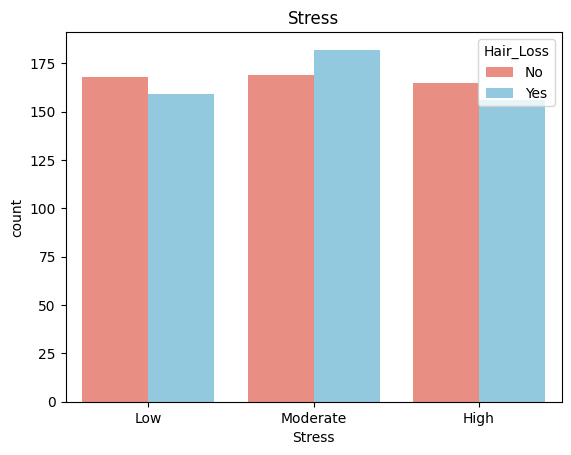

In [ ]:
# Hair Loss VS Stress
order = ['Low', 'Moderate', 'High']

sns.countplot(data=hair, x='Stress', hue='Hair_Loss', palette=custom_palette, order=order)
plt.title('Stress')
plt.show()

We note that more individuals suffering from Moderate stress than Low or High have lost their hair.

In [ ]:
contingency_table_Stress= pd.crosstab(hair['Hair_Loss'], hair['Stress'])

# chi2 test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_Stress)

# results output
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.9565232880531387
P-value: 0.6198599930985773
Degrees of freedom: 2
Expected frequencies table:
[[161.3033033  164.31831832 176.37837838]
 [159.6966967  162.68168168 174.62162162]]


p-val > 0.05.

The p-value of about 0.620 indicates that there is not enough evidence to reject the null hypothesis.
Therefore, based on these results, we cannot conclude that there is a significant association between hair loss and stress levels in this dataset.

### Hair Loss VS Medications & Treatments

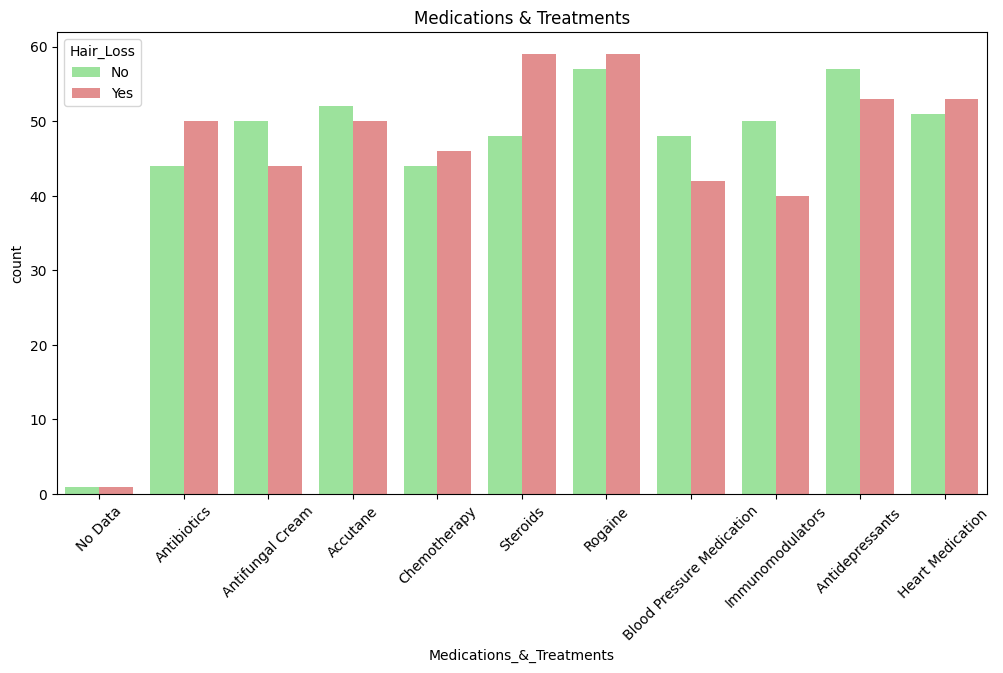

In [ ]:
# Hair Loss VS Medications_&_Treatments
custom_palette = {'Yes': 'lightcoral', 'No': 'lightgreen'}

plt.figure(figsize=(12, 6))
sns.countplot(data=hair, x='Medications_&_Treatments', hue='Hair_Loss', palette=custom_palette)
plt.title('Medications & Treatments')
plt.xticks(rotation=45)
plt.show()

In [ ]:
contingency_table_MT=  pd.crosstab(hair['Hair_Loss'], hair['Medications_&_Treatments'])

# chi2 test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_MT)

# results output
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 3.685035938072647
P-value: 0.9604391135042174
Degrees of freedom: 10
Expected frequencies table:
[[51.25525526 47.23523524 55.27527528 47.23523524 45.22522523 45.22522523
  52.26026026 45.22522523  1.00500501 58.29029029 53.76776777]
 [50.74474474 46.76476476 54.72472472 46.76476476 44.77477477 44.77477477
  51.73973974 44.77477477  0.99499499 57.70970971 53.23223223]]


(p-val > 0.05)
The p-value of about 0.960 indicates that there is not enough evidence to reject the null hypothesis.
Therefore, based on these results, we cannot conclude that there is a significant association between treatment type and hair loss in this dataset.

### Hair Loss VS Nutritional Deficiencies

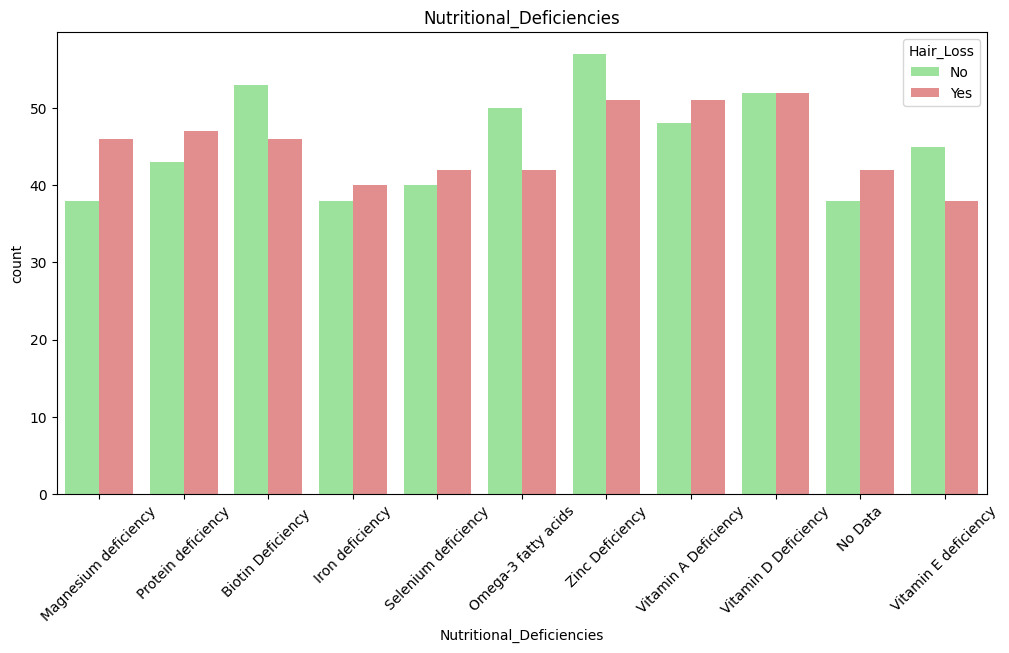

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=hair, x='Nutritional_Deficiencies', hue='Hair_Loss', palette=custom_palette)
plt.title('Nutritional_Deficiencies')
plt.xticks(rotation=45)
plt.show()

In [ ]:
contingency_table_ND=  pd.crosstab(hair['Hair_Loss'], hair['Nutritional_Deficiencies'])

# chi2 test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_ND)

# results output
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 3.42001126417155
P-value: 0.96974477918253
Degrees of freedom: 10
Expected frequencies table:
[[49.74774775 39.1951952  42.21021021 40.2002002  46.23023023 45.22522523
  41.20520521 49.74774775 52.26026026 41.70770771 54.27027027]
 [49.25225225 38.8048048  41.78978979 39.7997998  45.76976977 44.77477477
  40.79479479 49.25225225 51.73973974 41.29229229 53.72972973]]


(P-VALUE > 0.05)
The p-value of about 0.970 indicates that there is not enough evidence to reject the null hypothesis.
Therefore, based on these results, we cannot conclude that there is a significant association between nutritional deficiencies and hair loss in this dataset.

### Hair Loss VS Environmental Factors

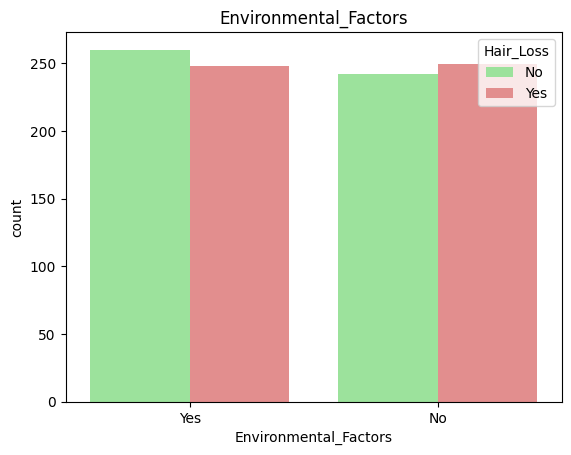

In [ ]:
sns.countplot(data=hair, x='Environmental_Factors', hue='Hair_Loss', palette=custom_palette)
plt.title('Environmental_Factors')
plt.show()

In [ ]:
contingency_table_EF=  pd.crosstab(hair['Hair_Loss'], hair['Environmental_Factors'])

# chi2 test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_EF)

# results output
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.28649088357189095
P-value: 0.5924780802381315
Degrees of freedom: 1
Expected frequencies table:
[[246.72872873 255.27127127]
 [244.27127127 252.72872873]]


P-VALUE > 0.05
The p-value of about 0.592 indicates that there is not enough evidence to reject the null hypothesis.
Therefore, based on these results, we cannot conclude that there is a significant association between environmental factors and hair loss in this dataset.

### Hair Loss VS Hormonal Changes

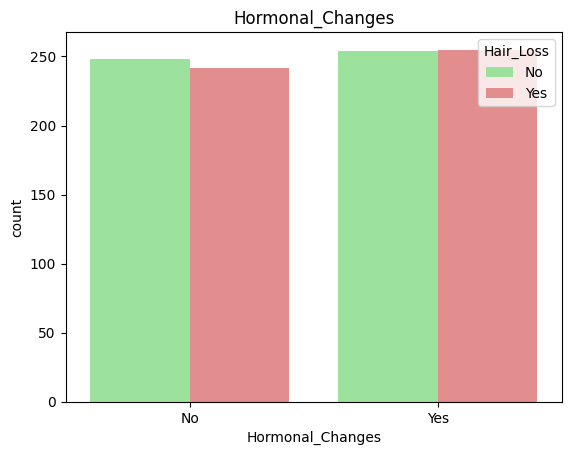

In [ ]:
sns.countplot(data=hair, x='Hormonal_Changes', hue='Hair_Loss', palette=custom_palette)
plt.title('Hormonal_Changes')
plt.show()

In [ ]:
contingency_table_HC=  pd.crosstab(hair['Hair_Loss'], hair['Hormonal_Changes'])

# chi2 test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_HC)

# results output
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 0.025996034340852625
P-value: 0.8719100031066214
Degrees of freedom: 1
Expected frequencies table:
[[246.22622623 255.77377377]
 [243.77377377 253.22622623]]


P VALUE > 0.05
The p-value of about 0.872 indicates that there is not enough evidence to reject the null hypothesis.
Therefore, based on these results, we cannot conclude that there is a significant association between hormonal changes and hair loss in this dataset.


# Prediction

### Linear Regression

I create a constructor consisting of the columns of the hair dataframe to use as input for a linear regression model to predict the Hair_Loss category, using scikit-learn:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

hair_mapped = hair.copy()

# LabelEncoder to convert categorical columns to numeric ones
label_encoder = LabelEncoder()
categorical_columns = hair_mapped.select_dtypes(include=['object']).columns
for col in categorical_columns:
    hair_mapped[col] = label_encoder.fit_transform(hair_mapped[col])

# extract the features (predictor variables) and the target (variable to be predicted)
X = hair_mapped.drop(columns=['Hair_Loss'])  # Features
y = hair_mapped['Hair_Loss']  # Target

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Valuing the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.53


An accuracy of 53% may indicate that the model cannot significantly predict the target variable with the given features.

### PPS

To make predictions on my data I use Predictive Power Score (pps):
is a metric used in machine learning and data analysis to measure the predictive relationship between variables. It measures the ability of one variable to predict another variable in a dataset.
PPS is similar to correlation, but is able to capture non-linear and not necessarily linear relationships between variables.

 The value of the PPS ranges from 0 to 1, where 0 indicates no predictive relationship and 1 indicates a perfect predictive relationship.
 A higher PPS therefore indicates a greater ability of the variable to predict another variable in the dataset.

So I want to go and make a prediction and figure out which variables predict Hair Loss.

In [ ]:
!pip install ppscore
import ppscore as pps

In [ ]:
#  remove the target variable 'Hair_Loss' from the dataset
features = hair.drop("Hair_Loss", axis=1)

# dictionary to store the PPS of each variable with respect to 'Hair_Loss'
pps_scores = {}

# compute the PPS for each variable with respect to 'Hair_Loss'.
for column in features.columns:
    pps_score = pps.score(hair, column, "Hair_Loss")['ppscore']
    pps_scores[column] = pps_score

# print the PPS of each variable with respect to 'Hair_Loss'.
for variable, score in pps_scores.items():
    print("PPS tra", variable, "e Hair_Loss:", score)

PPS tra Genetics e Hair_Loss: 0.06670040472628246
PPS tra Hormonal_Changes e Hair_Loss: 0
PPS tra Medications_&_Treatments e Hair_Loss: 0
PPS tra Nutritional_Deficiencies e Hair_Loss: 0
PPS tra Stress e Hair_Loss: 0
PPS tra Age e Hair_Loss: 0.029364951788654472
PPS tra Poor_Hair_Care_Habits e Hair_Loss: 0.06588414734525495
PPS tra Environmental_Factors e Hair_Loss: 0.04598036953421135
PPS tra Smoking e Hair_Loss: 0.08300907099027403
PPS tra Weight_Loss e Hair_Loss: 0.0712082448136068


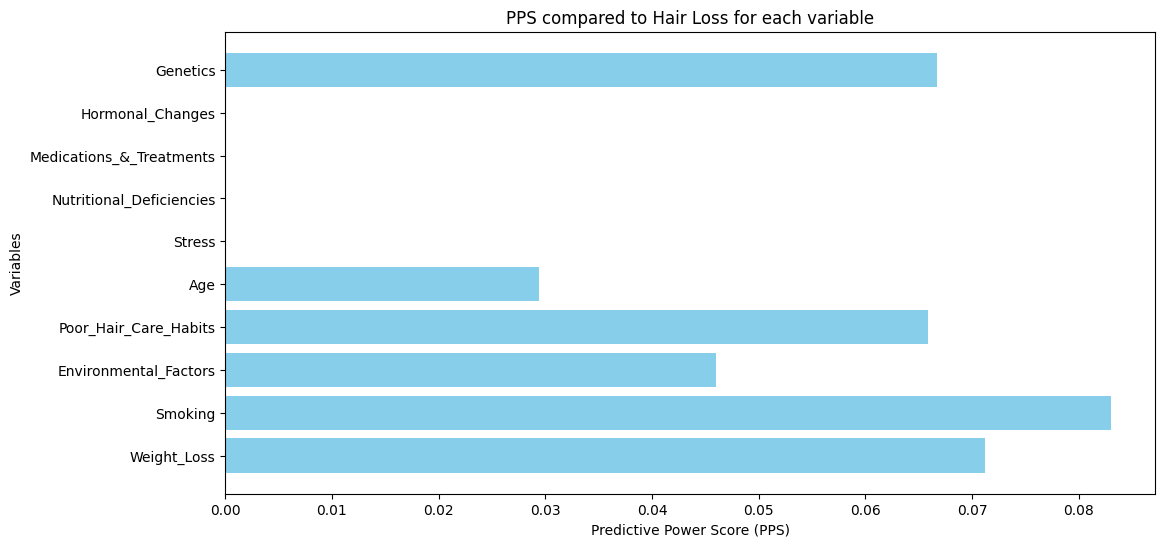

In [ ]:
# creation of a list of variable names and a list of corresponding PPS
variables = list(pps_scores.keys())
scores = list(pps_scores.values())

# bar plot
plt.figure(figsize=(12, 6))
plt.barh(variables, scores, color='skyblue')
plt.xlabel('Predictive Power Score (PPS)')
plt.ylabel('Variables')
plt.title('PPS compared to Hair Loss for each variable')
plt.gca().invert_yaxis()  # inversion of the y-axis
plt.show()

So, from the PPS values we deduce that no variable is useful for a perfect predictive relationship to Hair Loss, in fact the values are all around 0.
From the graph, it might seem that Smoking has a greater ability to predict the variable Hair Loss, but it should be noted that it is around 0.08, so very low and far from 1, which would mean a perfect predictive relationship.